In [1]:
import numpy as np
import pandas as pd
import math



%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
def percentile(arr, p):
    """Returns the pth percentile of the input array (the value that is at
    least as great as p% of the values in the array).

    If arr is not provided, percentile returns itself curried with p

    >>> percentile([1, 3, 5, 9], 74.9)
    5
    >>> percentile([1, 3, 5, 9], 75)
    5
    >>> percentile([1, 3, 5, 9], 75.1)
    9

    """
    if p == 0:
        return min(arr)
    assert 0 < p <= 100, 'Percentile requires a percent'
    i = (p/100) * len(arr)
    return sorted(arr)[math.ceil(i) - 1]



## Central Limit Theorem ##

In [3]:
united = pd.read_csv('united_summer2015.csv')
united

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
...,...,...,...,...
13820,8/31/15,1978,LAS,-4
13821,8/31/15,1993,IAD,8
13822,8/31/15,1994,ORD,3
13823,8/31/15,2000,PHX,-1


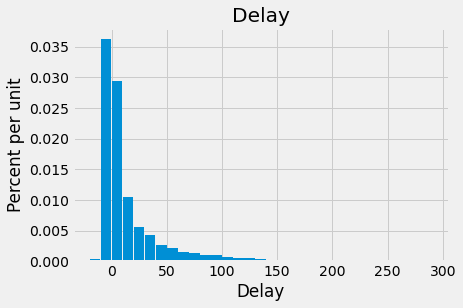

In [4]:
united.hist('Delay', bins = np.arange(-20, 300, 10), density=True, rwidth=0.95)
plt.ylabel("Percent per unit")
plt.xlabel('Delay')
plt.show()

In [6]:
delays = united['Delay']
mean_delay = np.mean(delays)
sd_delay = np.std(delays)

mean_delay, sd_delay

(16.658155515370705, 39.48019985160957)

In [6]:
percentile(delays,  50)

2

In [7]:
sample_size = 400

means_400 = np.array([])

for i in np.arange(10000):
    sampled_flights = united.sample(sample_size,  replace=True)
    sample_mean = np.mean(sampled_flights['Delay'])
    means_400 = np.append(means_400, sample_mean)

Population Average:  16.658155515370705


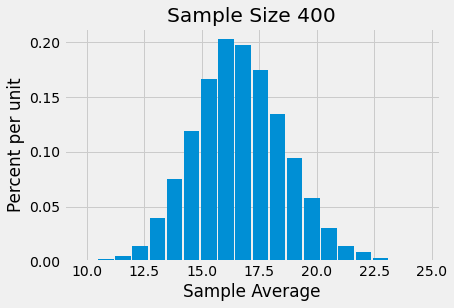

In [9]:
pd.DataFrame({'Sample Mean': means_400}).hist(bins = 20, density=True, rwidth=0.90)
plt.title('Sample Size ' + str(sample_size))
plt.xlabel('Sample Average')
plt.ylabel("Percent per unit")
print('Population Average: ', mean_delay)

In [10]:
np.average(means_400)

16.664186500000003

## Variability of the Sample Average ##

In [11]:
sample_size = 900

means_900 = np.array([])

for i in np.arange(10000):
    sampled_flights = united.sample(sample_size,  replace=True)
    sample_mean = np.mean(sampled_flights['Delay'])
    means_900 = np.append(means_900, sample_mean)

In [12]:
means_tbl = pd.DataFrame({
    '400': means_400,
    '900': means_900}
)

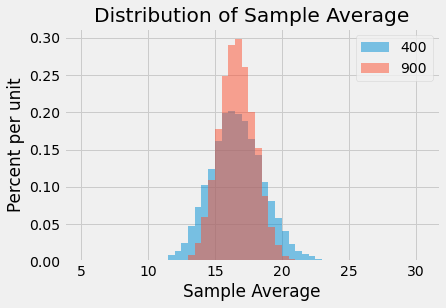

In [13]:

plt.title('Distribution of Sample Average');
plt.hist(means_tbl['400'], bins = np.arange(5, 31, 0.5),alpha=0.5, label='400', density=True)
plt.hist(means_tbl['900'], bins = np.arange(5, 31, 0.5),alpha=0.5, label='900', density=True)

plt.xlabel('Sample Average')
plt.ylabel('Percent per unit')
plt.legend( )
plt.show()

In [13]:
len(united)

13825

In [14]:
"""Empirical distribution of random sample means"""

def sample_means(sample_size):
    
    repetitions = 10000
    means =  np.array([])

    for i in range(repetitions):
        sampled_flights = united.sample(sample_size,  replace=True)
        sample_mean = np.mean(sampled_flights['Delay'])
        means = np.append(means, sample_mean)

    sample_means = pd.DataFrame({'Sample Mean': means})
    
    # Display empirical histogram and print all relevant quantities
    sample_means.hist(bins=20, density=True, rwidth=0.90)
    plt.xlabel('Sample Means')
    plt.ylabel("Percent per unit")
    plt.title('Sample Size ' + str(sample_size))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(united['Delay']))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(united['Delay']))
    print("SD of sample means:", np.std(means))

Sample size:  100
Population mean: 16.658155515370705
Average of sample means:  16.606603
Population SD: 39.48019985160957
SD of sample means: 3.9482280291785328


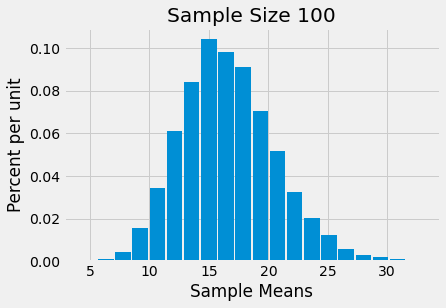

In [15]:
sample_means(100)

Sample size:  400
Population mean: 16.658155515370705
Average of sample means:  16.649014
Population SD: 39.48019985160957
SD of sample means: 1.9628694672096767


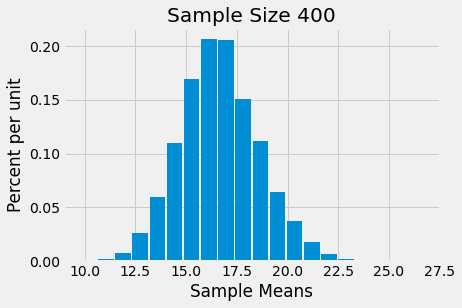

In [16]:
sample_means(400)

Sample size:  625
Population mean: 16.658155515370705
Average of sample means:  16.6647016
Population SD: 39.48019985160957
SD of sample means: 1.5853610419476818


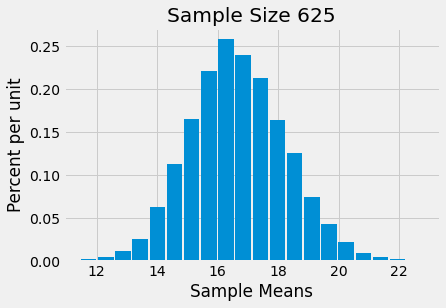

In [17]:
sample_means(625)

In [18]:
sd_delay, sd_delay / np.array([10, 20, 25])

(39.48019985160957, array([3.94801999, 1.97400999, 1.57920799]))

In [19]:
sample_sizes = np.arange(50, 401, 50)

sd_of_sample_means = np.array([])

for n in sample_sizes:
    means = np.array([])
    for i in np.arange(10000):
        means = np.append(means, np.mean(united.sample(n, replace=True)['Delay']))
    sd_of_sample_means = np.append(sd_of_sample_means, np.std(means))

In [20]:
sd_comparison = pd.DataFrame({
    'Sample Size n': sample_sizes,
    'SD of 10,000 Sample Means': sd_of_sample_means,
    'Population_SD/sqrt(n)': sd_delay/np.sqrt(sample_sizes)}
)

In [21]:
sd_comparison

,Sample Size n,"SD of 10,000 Sample Means",Population_SD/sqrt(n)
0,50,5.677725,5.583343
1,100,3.937624,3.948020
2,150,3.220783,3.223545
3,200,2.793314,2.791672
4,250,2.524375,2.496947
5,300,2.277308,2.279390
6,350,2.102137,2.110305
7,400,1.968513,1.974010


<AxesSubplot:xlabel='Sample Size n', ylabel='SD of 10,000 Sample Means'>

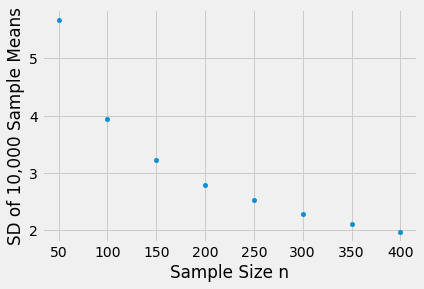

In [22]:
sd_comparison.plot.scatter('Sample Size n', 'SD of 10,000 Sample Means')

<AxesSubplot:xlabel='Sample Size n', ylabel='Population_SD/sqrt(n)'>

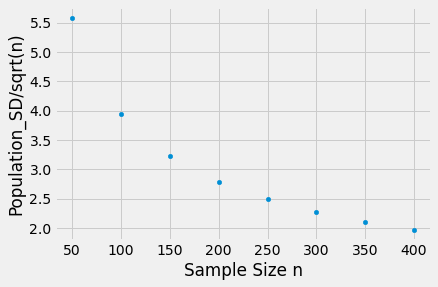

In [23]:
sd_comparison.plot.scatter('Sample Size n', 'Population_SD/sqrt(n)')